## Research Proposal, Capstone 2

## The Problem 

Employee attrition can have significant economic costs to a business.  One study$^{1}$ by the Center for American Progress found that the cost of losing an emlpoyee can range from 16% to 213% of their annual salary.  There are many hidden costs associated with employee attrition.  New employees have to be trained and onboarded with a company, which takes time and resources.  Additionally, the interview process associated with new hires can be long and tedious, has significant associated productivity costs, and new hires can often take up to two years to reach status quo levels of productivity.  High rates of attrition can also affect the morale and productivity of remaining employees: no one enjoys the feeling of working on a sinking ship.

## Analysis 
IBM HR data was analyzed to find probable causes of employee attrition.  The data showed that emloyee reported metrics “Job Satisfaction” and “Environment Satisfaction” were the two strongest correlates of attrition. 
Both of these data were reported categorically as follows: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'.

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind
%matplotlib inline
sns.set()

In [12]:
#assign data frames
df = pd.read_csv('Data/IMB_HR.csv')
df_quitters = df.loc[lambda df: df['Attrition'] == 'Yes', :]
df_stayers = df.loc[lambda df: df['Attrition'] == 'No', :]

EnvironmentSatisfaction reults:  Ttest_indResult(statistic=1.8645770597775324, pvalue=0.06297715070945568)


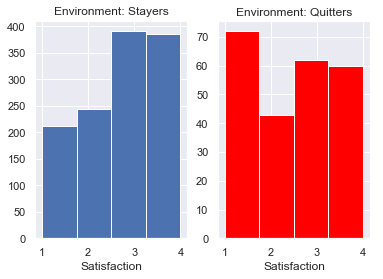

In [13]:
#Plot histograms of EnvironmentSatisfaction for quitters and stayers
plt.subplot(1, 2, 1)
plt.hist(df_stayers['EnvironmentSatisfaction'], bins=4)
plt.title('Environment: Stayers')
plt.xlabel('Satisfaction')

plt.subplot(1, 2, 2)
plt.hist(df_quitters['EnvironmentSatisfaction'], bins=4, color='red')
plt.title('Environment: Quitters')
plt.xlabel('Satisfaction')
plt.show

#Take a random sample of both quitters and stayers for the T-test
pop1 = np.random.choice(df_quitters['EnvironmentSatisfaction'], 200, replace=True)
pop2 = np.random.choice(df_stayers['EnvironmentSatisfaction'], 200, replace=True)

print('EnvironmentSatisfaction reults: ', ttest_ind(pop2, pop1, equal_var=False))

JobSatisfaction reults:  Ttest_indResult(statistic=3.1823407922590277, pvalue=0.001575616128895797)


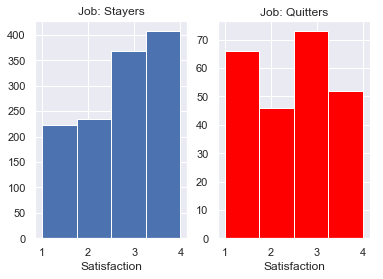

In [14]:
#Plot histograms of JobSatisfaction for quitters and stayers
plt.subplot(1, 2, 1)
plt.hist(df_stayers['JobSatisfaction'], bins=4)
plt.title('Job: Stayers')
plt.xlabel('Satisfaction')

plt.subplot(1, 2, 2)
plt.hist(df_quitters['JobSatisfaction'], bins=4, color='red')
plt.title('Job: Quitters')
plt.xlabel('Satisfaction')
plt.show

#Take a random sample of both quitters and stayers for the T-test
pop10 = np.random.choice(df_quitters['JobSatisfaction'], 200, replace=True)
pop20 = np.random.choice(df_stayers['JobSatisfaction'], 200, replace=True)

print('JobSatisfaction reults: ', ttest_ind(pop20, pop10, equal_var=False))

#null hypothesis 2: reported JobSatisfaction is not a meaningful predictor of attrition
#Ttest_indResult(statistic=3.0984688002063905, pvalue=0.0022282680241966554)
#with a p-value this small, we reject the null hypothesis.

Histograms of satisfaction data show a stark contrast between employees who left the company and employees who stayed. The p-values of a comparative t-test between the two groups corroborate the initial impression that these two parameters are indeed diagnostic of employee attrition. While the correlation between satisfaction rates and attrition is robust, an experiment should be performed to measure the actual effect of an experimental treatment on the suspected cause of attrition.

## Hypothesis
A mentorship program implemented at IBM will lower attrition rates among employees. 


## Method
In house mentorship programs have been shown to be a low cost ways of reducing employee attrition for certain companies$^2$.  Mentorship also has the added bonus of potentially increasing the productivity of the mentees. 
Employees receiving the treatment will be randomly selected. Rollout will initially include 10% of active employees for two months; this is to ensure that the experiment can be rolled back easily if there are any unforseen issues with implementation. IBM has more than 350,000 employees, so the sample size of this stage should be ~35,000.  The second stage will include 30% of employees (sample size ~100,000). The employees not recieving the treatment will serve as the control group.  Mentors will be assigned to mentees in a one-to-one ratio, so 50% of participants will be mentors and 50% will be mentees.  Mentors will have at least two years more experience with IBM than their assigned mentees. Mentor-mentee assignemnts will be made randomly within departments.  Mentorship will consits of bi-weekly meetings, to be arranged by the participants. A new metric, “Mentorship Satisfaction” will be collected by the HR department. Participants will enter this data weekly in a shared internal database.  Mentors and mentees can be reassigned by HR upon request, or moved to the control group if they wish to opt out of the treatment.     

## Evaluation
A paired t-test will be perfomed on attrition rates of the treatment group versus the control group after six months to evaluate the results of the experiment.  Evaluation will be intradepartmental (HR, Sales, Engineering, and Management). A p-value of 0.05 or less in all departments will confirm the hypothesis.  The HR department will continue to collect data on “Environment Satisfaction” and “Job Satisfaction” to evaluate if they continue to correlate with attrition rates over the course of the experiment.  Productivity data will also be collected in an effort to evaluate hidden costs or compensations of the program.

## Sources
1. Heather Boushey and Sarah Jane Glynn, "There are Significant Business Costs to Replacing Employees," Center for American Progress, November 16, 2012, https://www.americanprogress.org/wp-content/uploads/2012/11/CostofTurnover.pdf

2. Jonah Rockoff, "Does Mentoring Reduce Turnover and Improve Skills of New Employees? Evidence from Teachers in New York City", Columbia Business School, February 2008, https://www0.gsb.columbia.edu/faculty/jrockoff/rockoff_mentoring_february_08.pdf